CSV not found. Using Keras IMDB 50k dataset instead.
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



===== Logistic Regression Results =====
Accuracy : 0.8927
Precision: 0.8820782253356684
Recall   : 0.9066
F1 Score : 0.894171022783312

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.91      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



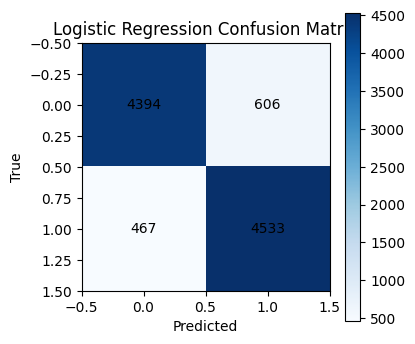

Epoch 1/8
250/250 ━━━━━━━━━━━━━━━━━━━━ 205s 807ms/step - accuracy: 0.5052 - loss: 0.6935 - val_accuracy: 0.5219 - val_loss: 0.6899
Epoch 2/8
250/250 ━━━━━━━━━━━━━━━━━━━━ 259s 800ms/step - accuracy: 0.5245 - loss: 0.6967 - val_accuracy: 0.5334 - val_loss: 0.6813
Epoch 3/8
250/250 ━━━━━━━━━━━━━━━━━━━━ 206s 814ms/step - accuracy: 0.5509 - loss: 0.6641 - val_accuracy: 0.5584 - val_loss: 0.6686
Epoch 4/8
250/250 ━━━━━━━━━━━━━━━━━━━━ 200s 800ms/step - accuracy: 0.6737 - loss: 0.5848 - val_accuracy: 0.7122 - val_loss: 0.5972
Epoch 5/8
250/250 ━━━━━━━━━━━━━━━━━━━━ 202s 808ms/step - accuracy: 0.7493 - loss: 0.5345 - val_accuracy: 0.8145 - val_loss: 0.4751
Epoch 6/8
250/250 ━━━━━━━━━━━━━━━━━━━━ 199s 798ms/step - accuracy: 0.8429 - loss: 0.3840 - val_accuracy: 0.8196 - val_loss: 0.5122
Epoch 7/8
250/250 ━━━━━━━━━━━━━━━━━━━━ 206s 813ms/step - accuracy: 0.8810 - loss: 0.3535 - val_accuracy: 0.8530 - val_loss: 0.3745
Epoch 8/8
250/250 ━━━━━━━━━━━━━━━━━━━━ 267s 835ms/step - accuracy: 0.9289 - loss: 0

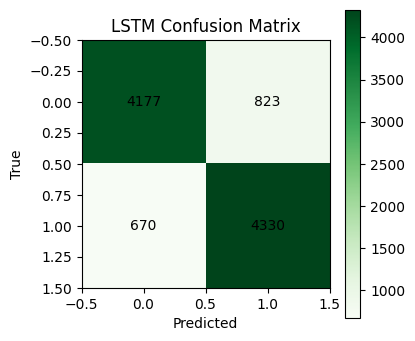

Epoch 1/8
250/250 ━━━━━━━━━━━━━━━━━━━━ 390s 2s/step - accuracy: 0.7212 - loss: 0.5185 - val_accuracy: 0.8685 - val_loss: 0.3318
Epoch 2/8
250/250 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.9096 - loss: 0.2410 - val_accuracy: 0.8815 - val_loss: 0.3098
Epoch 3/8
250/250 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.9432 - loss: 0.1633 - val_accuracy: 0.8756 - val_loss: 0.3626
Epoch 4/8
250/250 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.9367 - loss: 0.1674 - val_accuracy: 0.8736 - val_loss: 0.4366
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 182ms/step

===== Bi-LSTM Results =====
Accuracy : 0.8804
Precision: 0.8567141785446362
Recall   : 0.9136
F1 Score : 0.8842431281455672

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      5000
           1       0.86      0.91      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.8

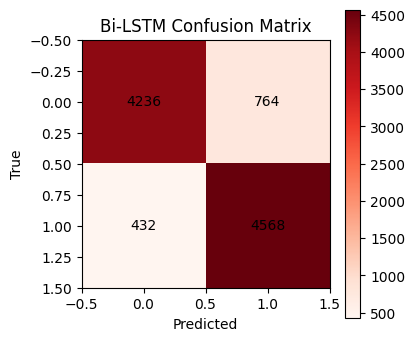

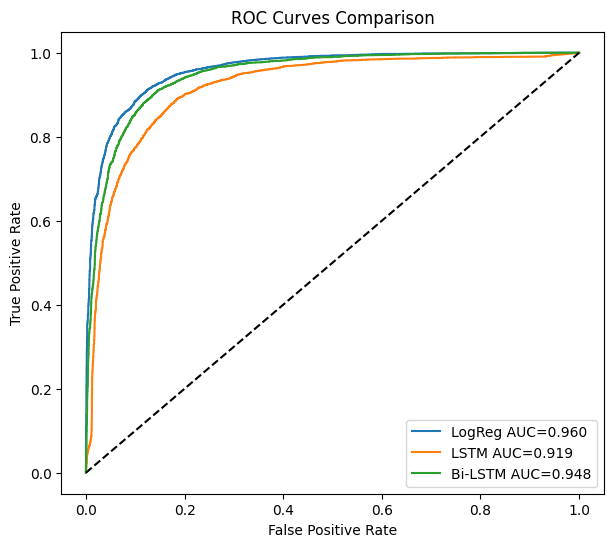

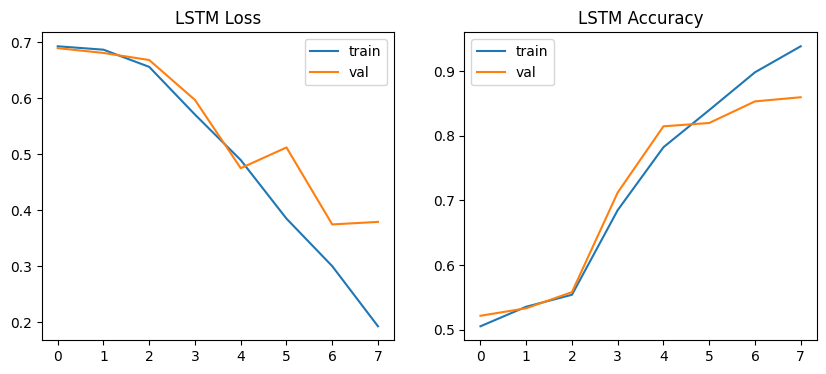

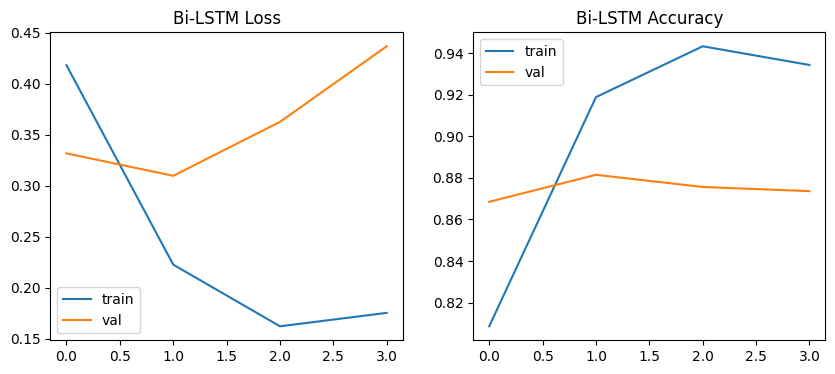

In [2]:
!pip -q install numpy pandas scikit-learn tensorflow keras nltk

import numpy as np
import pandas as pd
import random, re, os
import nltk
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix,
    roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt

# 1) Reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)


# 2) Load IMDB 50k dataset
if os.path.exists("IMDB Dataset.csv"):
    print("Using local CSV: IMDB Dataset.csv")
    df = pd.read_csv("IMDB Dataset.csv")
    df = df[['review', 'sentiment']].dropna()
    raw_texts = df["review"].astype(str).values
    labels = df["sentiment"].map({"positive": 1, "negative": 0}).values

else:
    print("CSV not found. Using Keras IMDB 50k dataset instead.")
    from tensorflow.keras.datasets import imdb
    (x_train, y_train), (x_test, y_test) = imdb.load_data()

    word_index = imdb.get_word_index()
    index_to_word = {v + 3: k for k, v in word_index.items()}
    index_to_word[0] = "<PAD>"
    index_to_word[1] = "<START>"
    index_to_word[2] = "<UNK>"
    index_to_word[3] = "<UNUSED>"

    def decode_review(encoded):
        return " ".join(index_to_word.get(i, "?") for i in encoded)

    train_raw = [decode_review(x) for x in x_train]
    test_raw  = [decode_review(x) for x in x_test]

    raw_texts = np.array(train_raw + test_raw)
    labels = np.array(list(y_train) + list(y_test))


# 3) Cleaning (as paper states)
nltk.download("stopwords")
stop_words = set(nltk.corpus.stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)   # remove special chars/numbers
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

clean_texts = np.array([clean_text(t) for t in raw_texts])


# 4) SAME 80/20 train-test split for ALL models

X_train_text, X_test_text, y_train, y_test = train_test_split(
    clean_texts, labels,
    test_size=0.2,          # exact paper split: 80/20
    random_state=SEED,
    shuffle=True,
    stratify=labels
)


# 5) Logistic Regression with TF-IDF (20,000 features)
tfidf = TfidfVectorizer(max_features=20000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf  = tfidf.transform(X_test_text)

lr_model = LogisticRegression(max_iter=200, random_state=SEED)
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)
y_prob_lr = lr_model.predict_proba(X_test_tfidf)[:, 1]

print("\n===== Logistic Regression Results =====")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall   :", recall_score(y_test, y_pred_lr))
print("F1 Score :", f1_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(4,4))
plt.imshow(cm_lr, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_lr[i, j], ha="center", va="center")
plt.show()

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)


# 6) Tokenization + Padding for LSTM / Bi-LSTM (on CLEANED text)
VOCAB_SIZE = 20000
MAX_LEN = 200
EMB_DIM = 128

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<UNK>")
tokenizer.fit_on_texts(X_train_text)

train_seq = tokenizer.texts_to_sequences(X_train_text)
test_seq  = tokenizer.texts_to_sequences(X_test_text)

X_train_pad = pad_sequences(train_seq, maxlen=MAX_LEN, padding="post", truncating="post")
X_test_pad  = pad_sequences(test_seq,  maxlen=MAX_LEN, padding="post", truncating="post")

BATCH_SIZE = 128
EPOCHS = 8
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=2, restore_best_weights=True
)


# 7) LSTM Model (Embedding → LSTM → Dropout → Dense)
lstm_model = keras.Sequential([
    layers.Embedding(VOCAB_SIZE, EMB_DIM),
    layers.LSTM(128),
    layers.Dropout(0.2),     # dropout regularization (paper concept)
    layers.Dense(1, activation="sigmoid")
])

lstm_model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history_lstm = lstm_model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)

y_prob_lstm = lstm_model.predict(X_test_pad).ravel()
y_pred_lstm = (y_prob_lstm > 0.5).astype(int)

print("\n===== LSTM Results =====")
print("Accuracy :", accuracy_score(y_test, y_pred_lstm))
print("Precision:", precision_score(y_test, y_pred_lstm))
print("Recall   :", recall_score(y_test, y_pred_lstm))
print("F1 Score :", f1_score(y_test, y_pred_lstm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lstm))

cm_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(4,4))
plt.imshow(cm_lstm, cmap="Greens")
plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_lstm[i, j], ha="center", va="center")
plt.show()

fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_prob_lstm)
auc_lstm = roc_auc_score(y_test, y_prob_lstm)


# 8) Bi-LSTM Model (Embedding → BiLSTM → Dropout → Dense)
bilstm_model = keras.Sequential([
    layers.Embedding(VOCAB_SIZE, EMB_DIM),
    layers.Bidirectional(layers.LSTM(128)),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

bilstm_model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history_bilstm = bilstm_model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)

y_prob_bilstm = bilstm_model.predict(X_test_pad).ravel()
y_pred_bilstm = (y_prob_bilstm > 0.5).astype(int)

print("\n===== Bi-LSTM Results =====")
print("Accuracy :", accuracy_score(y_test, y_pred_bilstm))
print("Precision:", precision_score(y_test, y_pred_bilstm))
print("Recall   :", recall_score(y_test, y_pred_bilstm))
print("F1 Score :", f1_score(y_test, y_pred_bilstm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bilstm))

cm_bilstm = confusion_matrix(y_test, y_pred_bilstm)
plt.figure(figsize=(4,4))
plt.imshow(cm_bilstm, cmap="Reds")
plt.title("Bi-LSTM Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_bilstm[i, j], ha="center", va="center")
plt.show()

fpr_bilstm, tpr_bilstm, _ = roc_curve(y_test, y_prob_bilstm)
auc_bilstm = roc_auc_score(y_test, y_prob_bilstm)


# 9) ROC Curves (paper step)
plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg AUC={auc_lr:.3f}")
plt.plot(fpr_lstm, tpr_lstm, label=f"LSTM AUC={auc_lstm:.3f}")
plt.plot(fpr_bilstm, tpr_bilstm, label=f"Bi-LSTM AUC={auc_bilstm:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# 10) Training Curves
def plot_history(history, title):
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title(title + " Loss")
    plt.legend(["train","val"])

    plt.subplot(1,2,2)
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title(title + " Accuracy")
    plt.legend(["train","val"])

    plt.show()

plot_history(history_lstm, "LSTM")
plot_history(history_bilstm, "Bi-LSTM")
